# Paper - Example 3

## Initialization

In [1]:
# Import the pyKasso package
import pykasso as pk
import matplotlib.pyplot as plt
import numpy as np

# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0': 2582750,
    'y0': 1127767,
    'z0': 1000,
    'nx': 394,
    'ny': 193,
    'nz': 100,
    'dx': 20,
    'dy': 20,
    'dz': 20,
}

# Declare the project parameters
app.new_project(name='example_03', grid_parameters=grid_parameters)
nx, ny, nz = app.model.grid.shape
app.visualizer.notebook = True
dr = pk.DataReader(grid=app.project.grid)
extent = app.project.grid.extent
input_dir = 'example_03/inputs/'

font_size = 12
cpos = [1,-1.2,1.1]
window_size = (500, 350)
zoom = 1.3

## Visualize and define the model variables

### Topography

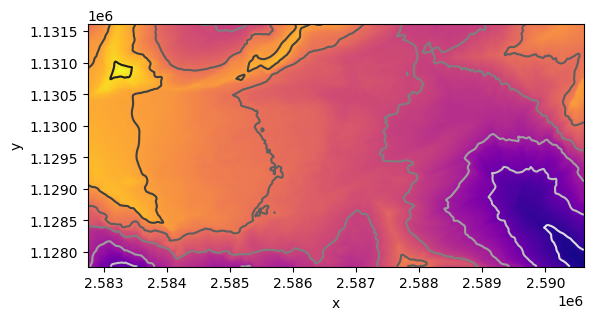

In [2]:
# Load
filename = input_dir + 'DEM.tif'
topography = dr.get_data_from_file(filename)

# Plot
imshow_options = {
    'extent' : extent,
    'cmap' : 'plasma'
}
contour_options = {
    'cmap' : 'binary'
}
fig = app.visualizer.mpl_plot_array_2D(topography,
                                       imshow_options=imshow_options,
                                       contour_options=contour_options)

### Bedrock

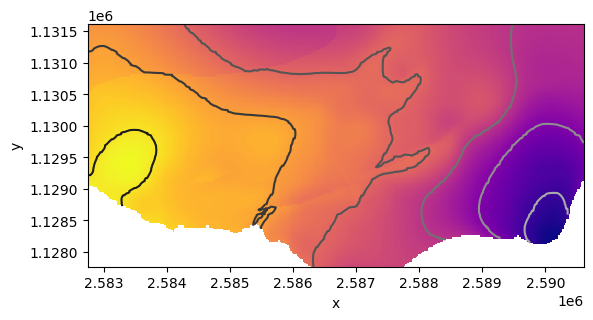

In [3]:
# Load
filename = input_dir + 'Bot_urgonien.tif'
bedrock = dr.get_data_from_file(filename)
bedrock = bedrock - 300
bedrock[bedrock < 0] = np.nan

# Plot
imshow_options = {
    'extent' : extent,
    'cmap' : 'plasma'
}
contour_options = {
    'cmap' : 'binary',
    'levels' : [i*300 for i in range(10)]
}
fig = app.visualizer.mpl_plot_array_2D(bedrock,
                                 imshow_options=imshow_options,
                                 contour_options=contour_options)

### Geologic model

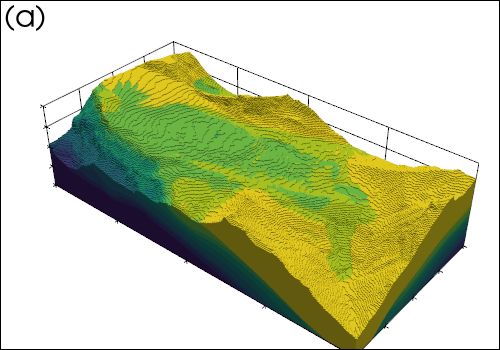

In [4]:
# Load geologic model
filename = input_dir + 'tsanfleuron_geology.vox'
df = dr.get_dataframe_from_file(filename)
geology = dr._get_data_from_vox_df(df)

# Set names
geology_names = {
    -9999: 'Out',
    0: None,
    1: 'UHNappe',
    2: 'Dogger',
    3: 'Malm',
    4: 'Berriasian',
    5: 'LateBerriasianValanginian',
    6: 'Hauterivian',
    7: 'EarlyBarremian',
    8: 'Urgonian',
    9: 'Eocene',
    10: 'Wildhorn',
}

# Set costs
geology_costs = {
    8: 0.4,
    9: 0.4,
}

# Set model
geology_model = {
    -9999: False,
    0: False,
    1: False,
    2: False,
    3: False,
    4: False,
    5: False,
    6: False,
    7: False,
    8: True,
    9: True,
    10: False,
}

# Plot
settings = {
    'text_options' : {
        'text': '(a)',
        'font_size': font_size,
    },
    'mask_values': [-9999],
    'show_scalar_bar': False,
}
fig = app.visualizer.pv_plot_array(
    geology,
    settings=settings,
    cpos=cpos,
    window_size=window_size,
    zoom=zoom,
    savefig=True,
    filename='fig\example_03_geologic_model',
)

### Faults model

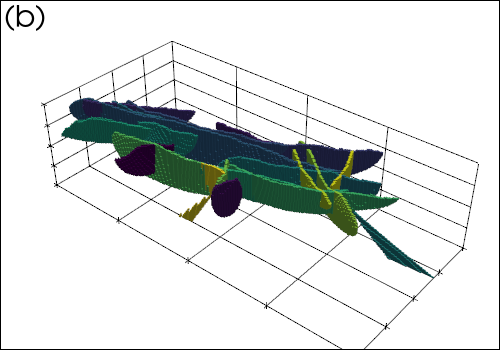

In [5]:
# Load faults model
filename = input_dir + 'tsanfleuron_faults.vox'
df = dr.get_dataframe_from_file(filename)
faults = dr._get_data_from_vox_df(df)

# Set names
faults_ids = list(range(21))
faults_names_ = ['Chevauchement', 'NEESOO1', 'NEESOO2', 'NESO1', 'NESO11',
                 'NESO2', 'NESO22', 'NESO3', 'NESO32', 'NESO4', 'NESO42',
                 'NESO43', 'NESO44', 'NESO5', 'NESO6', 'NESO7', 'NOOSEE1',
                 'NOOSEE2', 'NOOSEE3', 'NS2', 'OE1']
faults_names = {faults_id: faults_name for (faults_id, faults_name) in zip(faults_ids, faults_names_)}

# Plot
settings = {
    'text_options' : {
        'text': '(b)',
        'font_size': font_size,
    },
    'mask_values': [0],
    'show_scalar_bar': False,
}
fig = app.visualizer.pv_plot_array(
    faults,
    settings=settings,
    cpos=cpos,
    window_size=window_size,
    zoom=zoom,
    savefig=True,
    filename='fig\example_03_faults_model',
)

### Outlets

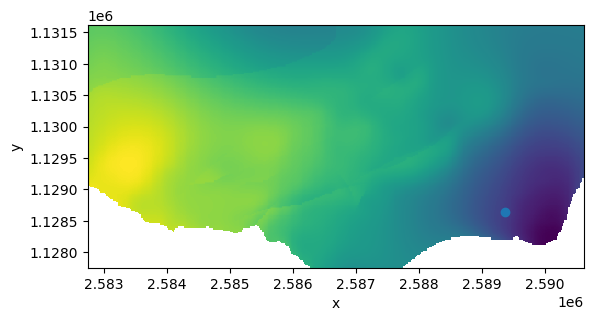

In [6]:
# Load - TODO
fname = input_dir + 'Outlet_ModeleG.txt'
outlet = dr.get_data_from_file(fname)
outlet[0] = outlet[0] - 300

# Plot
x, y = outlet
app.visualizer.mpl_plot_array_2D(bedrock, imshow_options={'extent':extent})
plt.scatter(x,y)

### Water table

In [7]:
i, j = app.model.grid.get_indices(outlet)
level = topography[i, j]
water_table = np.full((nx, ny), level)
level

array([1686.1437], dtype=float32)

## Gradient

In [8]:
# # Load
# fname = input_dir + 'tsanfleuron_20m_Gradients_XYZ.vox'
# df = dr.get_dataframe_from_file(fname, nrows=10)
# df

# grad_X = df[['X', 'Y', 'Z', 'vx']]
# grad_Y = df[['X', 'Y', 'Z', 'vy']]
# grad_Z = df[['X', 'Y', 'Z', 'vz']]
# grad_X = dr._get_data_from_vox_df(grad_X)
# grad_X

## Set the model

In [9]:
# Declare the model parameters
model_parameters = {
    'sks' : {
        'seed' : 3333,
        'algorithm': 'Riemann3',
        'costs': {'ratio': 0.1}
    },
    'domain' : {
        'water_table' : water_table,
    },
    'outlets' : {
        'data' : outlet,
        'number' : 1,
        'importance': [1],
        'subdomain' : 'domain_surface', 
    },
    'inlets' : {
        'data' : 'Inlets_ModeleG.txt',
        'number': 22,
        'importance': [1, 1, 2],
    },
    'geology' : {
        'data' : geology,
        'names' : geology_names,
        'costs' : geology_costs,
        'model' : geology_model,
    },
    'faults' : {
        'data' : faults,
        'names' : faults_names,
    },
    'fractures' : {
        'generate': {
            'family_01': {
                'density'      : 4.5e-4,
                'orientation'  : [32, 86],
                'dip'          : 90,
                'length'       : [20, 400],
                'alpha'        : 1.4,
            },
            'family_02': {
                'density'      : 1.2e-4,
                'orientation'  : [146, 196],
                'dip'          : 90,
                'length'       : [20, 130],
                'alpha'        : 1.2,
            },
            'family_03': {
                'density'      : 4.5e-4,
                'orientation'  : [98, 163],
                'dip'          : 90,
                'length'       : [20, 740],
                'alpha'        : 2.1,
            },
            'family_04': {
                'density'      : 2.8e-4,
                'orientation'  : [72, 115],
                'dip'          : 90,
                'length'       : [20, 160],
                'alpha'        : 1.8,
            }
        }
    }
}

In [10]:
# Compute 10 simulations
for i in range(2):
    model_parameters['sks']['seed'] = i
    # app.model.model_parameters = model_parameters
    # app.model._initialize()
    # app.model._build()
    app.model.generate(model_parameters=model_parameters)

In [11]:
app.model.conceptual_model_table

,feature,data_id,name,cost
model_id,,,,
0,Out,NaN,NaN,10.0
100,Geology,8.0,Urgonian,0.4
101,Geology,9.0,Eocene,0.4
200,Fractures,1.0,family_01,0.2
201,Fractures,2.0,family_02,0.2
202,Fractures,3.0,family_03,0.2
203,Fractures,4.0,family_04,0.2
300,Faults,1.0,NEESOO1,0.2
301,Faults,2.0,NEESOO2,0.2


In [12]:
app.model.geology.overview()

,names,costs,model,counts,freq,volume
-9999,Out,0.4,False,2417768,0.317952,19342144000
0,None,0.4,False,76042,0.010000,608336000
1,UHNappe,0.4,False,1176888,0.154768,9415104000
2,Dogger,0.4,False,332223,0.043689,2657784000
3,Malm,0.4,False,404256,0.053162,3234048000
4,Berriasian,0.4,False,734488,0.096590,5875904000
5,LateBerriasianValanginian,0.4,False,561294,0.073814,4490352000
6,Hauterivian,0.4,False,472503,0.062137,3780024000
7,EarlyBarremian,0.4,False,300860,0.039565,2406880000
8,Urgonian,0.4,True,520876,0.068498,4167008000


In [13]:
app.model.faults.overview()

,names,costs,model,counts,freq,volume
0,Chevauchement,0.2,False,7519504,0.988862,60156032000
1,NEESOO1,0.2,True,1872,0.000246,14976000
2,NEESOO2,0.2,True,1511,0.000199,12088000
3,NESO1,0.2,True,1961,0.000258,15688000
4,NESO11,0.2,True,3592,0.000472,28736000
5,NESO2,0.2,True,4554,0.000599,36432000
6,NESO22,0.2,True,9143,0.001202,73144000
7,NESO3,0.2,True,14130,0.001858,113040000
8,NESO32,0.2,True,2139,0.000281,17112000
9,NESO4,0.2,True,1422,0.000187,11376000


In [14]:
app.model.fractures.overview()

,names,costs,model,counts,freq,volume
0,family 0,0.2,False,7005462,0.921262,56043696000
1,family_01,0.2,True,315869,0.041539,2526952000
2,family_02,0.2,True,24910,0.003276,199280000
3,family_03,0.2,True,202995,0.026695,1623960000
4,family_04,0.2,True,54964,0.007228,439712000


## Fracturation analysis

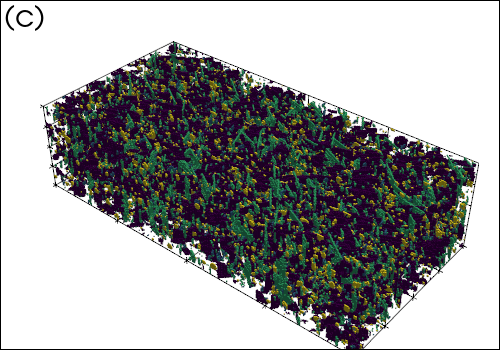

In [15]:
# Plot fracturation
settings = {
    'text_options' : {
        'text': '(c)',
        'font_size': font_size,
    },
    'mask_values': [0],
    'show_scalar_bar': False,
}
fig = app.visualizer.pv_plot_array(
    app.model.fractures.data_volume,
    settings=settings,
    cpos=cpos,
    window_size=window_size,
    zoom=zoom,
    savefig=True,
    filename='fig\example_03_fracturation_model',
)

In [16]:
fractures = app.model.fractures.fractures
families = app.model.fractures.families

hist_settings = {
    'by' : 'family_id',
    'bins' : 10,
    'layout' : (2,2),
    'density' : True
}

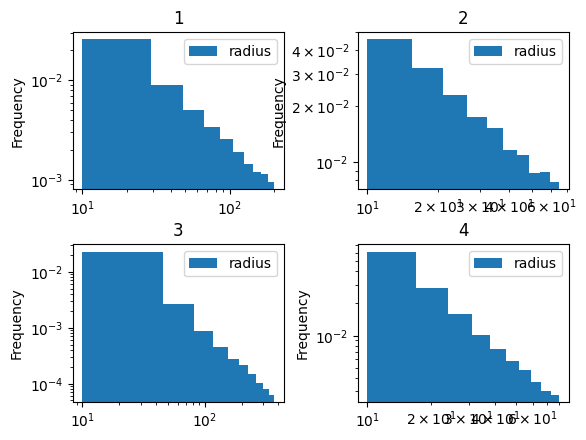

In [17]:
# Radius
axes = fractures.plot.hist(column='radius', logy=True, logx=True, **hist_settings)
plt.subplots_adjust(hspace=0.35, wspace=0.35)


array([[<Axes: title={'center': '1'}, ylabel='Frequency'>,
        <Axes: title={'center': '2'}, ylabel='Frequency'>],
       [<Axes: title={'center': '3'}, ylabel='Frequency'>,
        <Axes: title={'center': '4'}, ylabel='Frequency'>]], dtype=object)

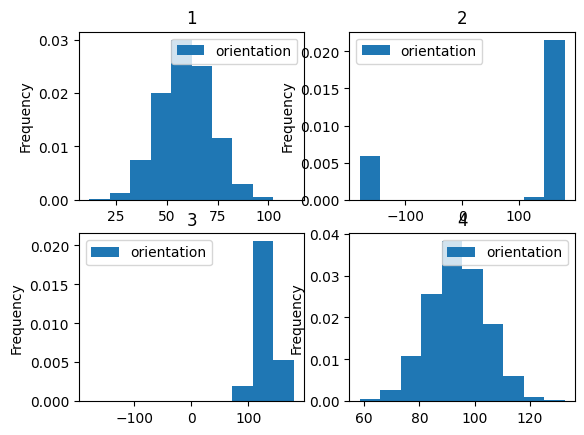

In [18]:
# Orientation
fractures.plot.hist(column='orientation', **hist_settings)

array([[<Axes: title={'center': '1'}, ylabel='Frequency'>,
        <Axes: title={'center': '2'}, ylabel='Frequency'>],
       [<Axes: title={'center': '3'}, ylabel='Frequency'>,
        <Axes: title={'center': '4'}, ylabel='Frequency'>]], dtype=object)

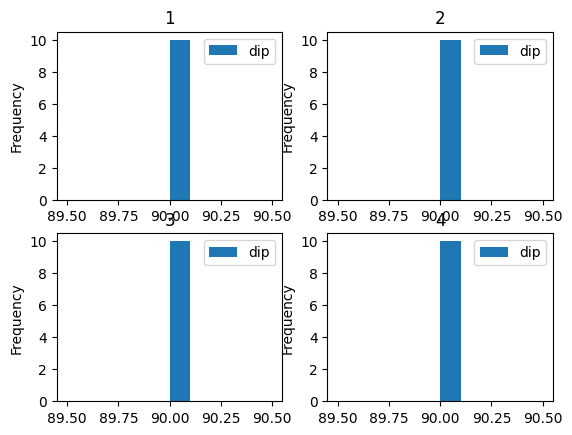

In [19]:
# Dip
fractures.plot.hist(column='dip', **hist_settings)

In [20]:
df = app.analyzer.compute_metrics()
app.analyzer.compare_metrics(df)

,mean length,cv length,length entropy,tortuosity,orientation entropy,aspl,cpd,mean degree,cv degree,correlation vertex degree
0,93.256108,2.186517,0.247121,1.156791,0.941989,63.239643,0.326989,2.527273,0.300897,-0.393244
1,79.382832,2.656964,0.098217,1.186599,0.931048,63.801421,0.416418,2.606635,0.287660,-0.385278


## Results in 3D

In [21]:
settings = {
    # 'text_options' : {
    # #     'text': '',
    # #     'position': 'upper_left',
    # #     'font_size': 18,
    # #     'color': None,
    # #     'font': None,
    # #     'shadow': False,
    # #     'name': None,
    # #     'viewport': False,
    # #     'orientation': 0.0
    # },
    # 'n_iteration' : -1,
    # 'ghost_values' : [10, 0.4],
    # 'ghost_values' : [0,2,3,4,5,6,7,10, -9999],
    # 'ghost_values' : [10, 0.4],
    # # 'ghost_subdomains' : ['domain_surface'],
    # 'show_grid' : False,
    # 'show_outline': True,
    # 'data_options': {},
    # 'threshold_options' : {
    #     'value' : [8,9]
    # },

    
    # # 'show_slice' : True,
    # 'show_colorbar' : True
    # 'fractures_options': {
    #     # 'family_id': [2,3],
        # 'max_number': 50,
    # },
}

In [22]:
app.visualizer.notebook = False
last_sims = app.project.get_last_simulations(1)
settings = {
    'text_options' : {
        'text': '(d)',
        'font_size': font_size,
    },
    'surfaces_options' : {
        # 'water_table' : {}
    },
    'show_outline' : True,
    'show_scalar_bar' : False,
    'mask_values': [0],
    'inlets_options' : {'point_size': 10},
    'outlets_options' : {'point_size': 10},
    
}
app.visualizer.pv_show(
    simulations=last_sims,
    features=['karst'],
    settings=settings,
    cpos=cpos,
    window_size=window_size,
    zoom=zoom,
    savefig=True,
    filename='fig\example_03_karst_model',
)

c:\Users\franc\OneDrive\Desktop\pykasso\pykasso\.venv\lib\site-packages\pyvista\plotting\plotter.py:6739: UserWarning: A screenshot is unable to be taken as the render window is not current or rendering is suppressed.
  warnings.warn(


In [23]:
plotter = app.visualizer.pv_show(
    simulations=[-1],
    features=['karst'],
    settings=settings,
    cpos=[1, -1, 1],
    return_plotter=True,
)
plotter.export_html('example_03.html')